# <h1 align="center"> © RsydMathTech. <h1/>

# Ridge Regression

## 1. Masalah Overfitting
- **Overfitting** terjadi saat model terlalu kompleks, misalnya polynomial dengan derajat tinggi.  
- Koefisien polinomial bisa menjadi **sangat besar**, terutama untuk fitur orde tinggi.  
- Akibatnya, model terlihat bagus di **training data**, tapi gagal generalisasi di **data baru**.  

Contoh:
- Fungsi asli: polynomial orde 4 (garis oranye).  
- Model polynomial orde 10: bisa mengikuti data, tetapi **sangat sensitif terhadap outlier**.  

---

## 2. Ridge Regression
**Ridge Regression** menambahkan **regularisasi L2** pada regresi linear/polinomial.  
Tujuan: mengontrol **besarnya koefisien** agar tidak terlalu ekstrem.  

Fungsi biaya Ridge:  

$$
J(\beta) = \sum_{i=1}^n (y_i - \hat{y}_i)^2 + \alpha \sum_{j=1}^p \beta_j^2
$$

Keterangan:  
- $\alpha$ = hyperparameter regulasi (ditentukan sebelum training).  
- Jika $\alpha = 0$: Ridge sama dengan OLS → rentan **overfitting**.  
- Jika $\alpha$ terlalu besar: koefisien mendekati nol → model bisa **underfitting**.  

---

## 3. Pengaruh Nilai $\alpha$
- $\alpha = 0$: model **overfit**.  
- $\alpha = 0.001$: overfitting mulai berkurang.  
- $\alpha = 0.01$: model mengikuti fungsi asli dengan baik.  
- $\alpha = 1$: tanda-tanda **underfitting**.  
- $\alpha = 10$: **underfit ekstrim**, model gagal mengikuti pola data.  

Semakin besar $\alpha$ → koefisien makin kecil → model makin sederhana.  

---

## 4. Menentukan Nilai $\alpha$ (Cross-Validation)
Langkah-langkah:  
1. Bagi data menjadi **train** dan **validation**.  
2. Tentukan beberapa kandidat nilai $\alpha$.  
3. Untuk setiap $\alpha$:  
   - Latih model pada data train.  
   - Prediksi pada data validation.  
   - Hitung metrik evaluasi ($R^2$ atau MSE).  
4. Pilih $\alpha$ dengan performa terbaik (misalnya $R^2$ maksimum).  

---

## 5. Visualisasi Efek $\alpha$
- **Sumbu X**: nilai $\alpha$  
- **Sumbu Y**: nilai $R^2$  
- **Garis merah**: training data  
- **Garis biru**: validation data  

Pola umum:  
- $R^2$ training → menurun seiring bertambahnya $\alpha$.  
- $R^2$ validation → naik dulu sampai titik optimum, lalu turun jika $\alpha$ terlalu besar.  

---

## 6. Catatan Penting
- Ridge Regression **tidak menghapus fitur**, hanya mengecilkan koefisien.  
- Cocok digunakan jika terdapat banyak fitur atau multikolinearitas.  
- Jika tujuan adalah **feature selection**, biasanya digunakan **Lasso Regression**.  

---

## 7. Inti Pembahasan
- Ridge Regression = solusi untuk **overfitting**.  
- Parameter $\alpha$ adalah kunci: mengontrol trade-off antara **bias** dan **variance**.  
- $\alpha$ terlalu kecil → overfit, $\alpha$ terlalu besar → underfit.  
- Nilai terbaik $\alpha$ dipilih menggunakan **cross-validation**.  


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

### 1. Data synthetic (polynomial + noise + outlier)


In [4]:
np.random.seed(42)
X = np.linspace(-3, 3, 50)
y = 0.5 * X**4 - X**3 - X**2 + X + np.random.normal(0, 3, size=50)

# Add one strong outlier
y[10] += 25

X = X[:, np.newaxis]

### 2. Setup Ridge Regularization


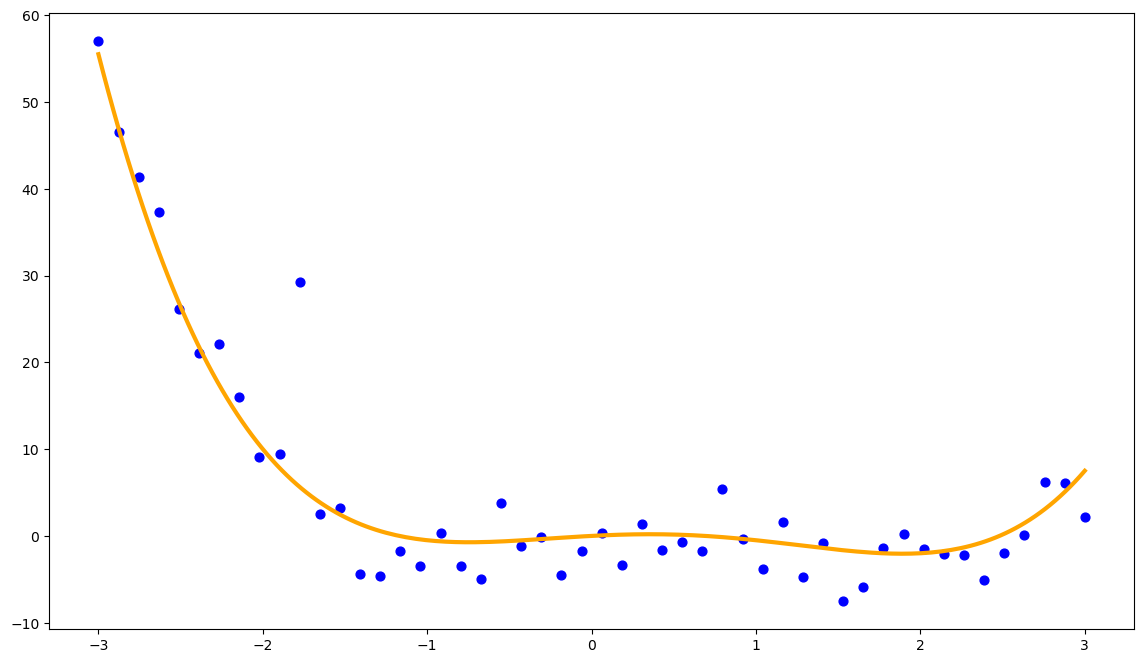

In [6]:
alphas = [0, 0.001, 0.01, 1, 10]   # values of alpha to test
degree = 10                        # polynomial degree
plt.figure(figsize=(14, 8))

# Plot original noisy data
plt.scatter(X, y, color="blue", s=40, label="Data")

# True underlying function (without noise)
X_plot = np.linspace(-3, 3, 200)[:, np.newaxis]
y_true = 0.5 * X_plot**4 - X_plot**3 - X_plot**2 + X_plot
plt.plot(X_plot, y_true, color="orange", linewidth=3, label="True Function")

### 3. Train Ridge models for each alpha


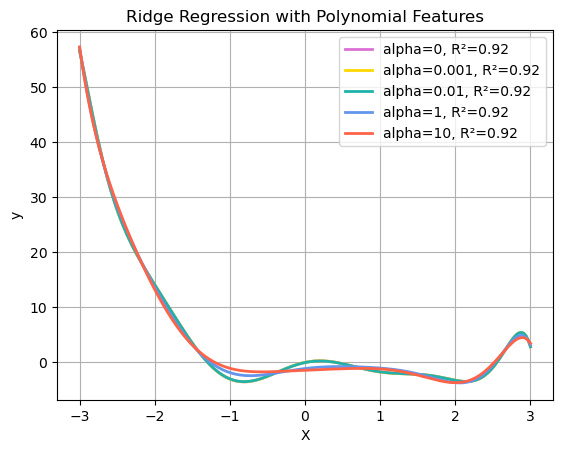

In [16]:
colors = ["orchid", "gold", "lightseagreen", "cornflowerblue", "tomato"]

for alpha, c in zip(alphas, colors):
    model = make_pipeline(PolynomialFeatures(degree), Ridge(alpha=alpha))
    model.fit(X, y)
    y_pred = model.predict(X_plot)
    score = r2_score(y, model.predict(X))
    plt.plot(X_plot, y_pred, color=c, linewidth=2,
             label=f"alpha={alpha}, R²={score:.2f}")

plt.xlabel("X")
plt.ylabel("y")
plt.title("Ridge Regression with Polynomial Features")
plt.legend()
plt.grid(True)
plt.show()

---
### Penjelasan visual:

Oranye = fungsi asli (ground truth).

Biru = data observasi (dengan noise + outlier).

Garis lain = hasil prediksi Ridge dengan berbagai $\alpha$.

### Dari plot dapat disimpulkan:

alpha=0 → overfit parah (ngikutin outlier banget).

alpha kecil (0.001, 0.01) → model mulai stabil & lebih mirip fungsi asli.

alpha besar (1, 10) → underfit (garis jadi terlalu halus, bahkan gagal tangkap pola).

---
Ridge Regression berhasil mengurangi overfitting dengan menekan besarnya koefisien polinomial.

Nilai α (regularization strength) jadi kunci:

α kecil → mirip regression biasa (bisa overfit).

α sedang → balance terbaik (good fit).

α besar → underfit.

Grafik plot tadi menunjukkan transisi ini dengan jelas: semakin besar α → semakin halus dan kaku garis fit-nya.